# GW150914 FI LnZ

In [ ]:
from bilby.gw.result import CBCResult

mcmc_res = CBCResult.from_hdf5("gw150914_runs/results/gw150914_ss.hdf5")
ns_res = CBCResult.from_hdf5("gw150914_runs/results/gw150914_ns.hdf5")

In [ ]:
print(f"MCMC: {mcmc_res.log_evidence:.3f} +/- {mcmc_res.log_evidence_err:.3}")
print(f"NS: {ns_res.log_evidence:.3f} +/- {ns_res.log_evidence_err:.3}")

## Plots

In [17]:
from funnel.fi_core import get_fi_lnz_list
from funnel.plotting import plot_fi_evidence_results
import matplotlib.pyplot as plt
import numpy as np

keys = ns_res.search_parameter_keys + ['log_prior', 'log_likelihood']

posterior_samples = ns_res.posterior[keys]


fi_results_10k = get_fi_lnz_list(posterior_samples, r_vals=np.geomspace(1e0, 1e8, 10000), num_ref_params=1, weight_samples_by_lnl=True)
fi_results_5k = get_fi_lnz_list(posterior_samples, r_vals=np.geomspace(1e0, 1e8, 5000), num_ref_params=1, weight_samples_by_lnl=True )
fi_results_1k = get_fi_lnz_list(posterior_samples, r_vals=np.geomspace(1e0, 1e8, 1000), num_ref_params=1, weight_samples_by_lnl=True)



|funnel|INFO| Calculating FI LnZ with 1 reference points and a posterior of size:(10455, 14) 
|funnel|INFO| Posterior columns:
a_1
a_2
azimuth
chirp_mass
log_likelihood
log_prior
mass_ratio
phase
phi_12
phi_jl
psi
theta_jn
tilt_1
tilt_2
time_jitter
zenith 


FI LnZ:   0%|          | 0/1 [00:00<?, ?it/s, FI LnZ: 0]

|funnel|INFO| Calculating FI LnZ with 1 reference points and a posterior of size:(10455, 14) 
|funnel|INFO| Posterior columns:
a_1
a_2
azimuth
chirp_mass
log_likelihood
log_prior
mass_ratio
phase
phi_12
phi_jl
psi
theta_jn
tilt_1
tilt_2
time_jitter
zenith 


FI LnZ:   0%|          | 0/1 [00:00<?, ?it/s, FI LnZ: 0]

|funnel|INFO| Calculating FI LnZ with 1 reference points and a posterior of size:(10455, 14) 
|funnel|INFO| Posterior columns:
a_1
a_2
azimuth
chirp_mass
log_likelihood
log_prior
mass_ratio
phase
phi_12
phi_jl
psi
theta_jn
tilt_1
tilt_2
time_jitter
zenith 


FI LnZ:   0%|          | 0/1 [00:00<?, ?it/s, FI LnZ: 0]

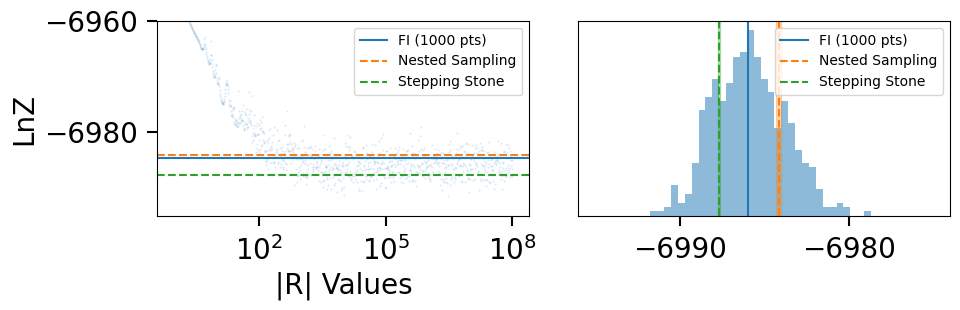

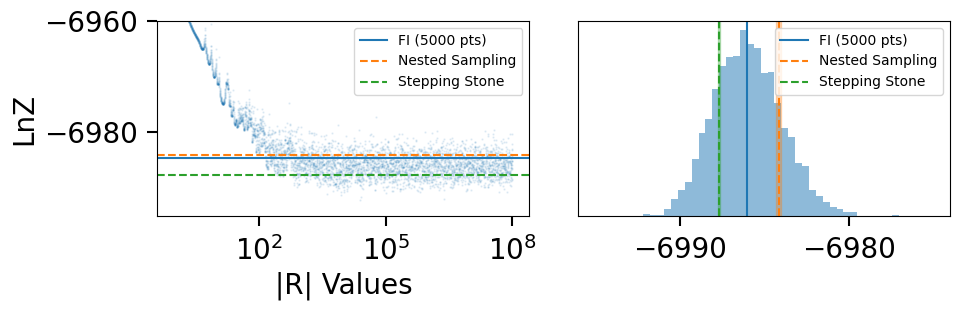

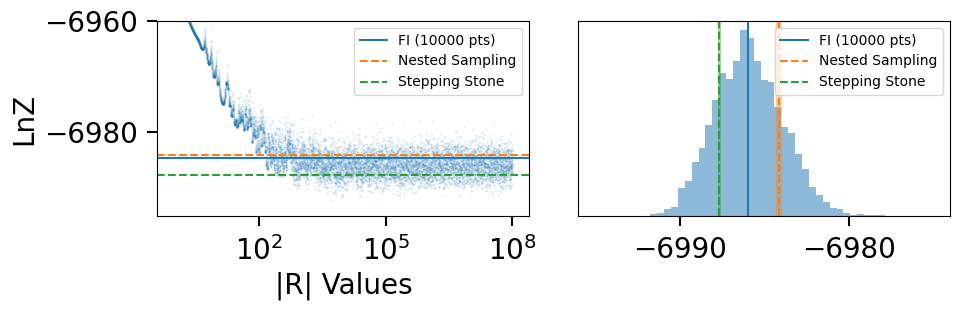

In [36]:
def plot_lnzs(fi_results, ns_res, mcmc_res):

    fig, axes = plt.subplots(1,2, figsize=(10,3.5))
    
    lnzs, r_vals, samp = fi_results

    lnz_noise = ns_res.log_noise_evidence
    fi_lnz = lnzs[0]+lnz_noise
    ns_lnz = ns_res.log_bayes_factor+lnz_noise
    ns_lnz_err = ns_res.log_evidence_err
    ss_lnz = mcmc_res.log_bayes_factor+lnz_noise
    ss_lnz_err = mcmc_res.log_evidence_err
    
    ax= axes[0]
    ax.scatter(r_vals, fi_lnz, s=0.5, alpha=0.1)
    ax.set_xscale('log')
    ax.axhline(np.median(fi_lnz), ls='-', color='C0', label=f'FI ({len(lnzs[0])} pts)')
    ax.axhline(ns_lnz, ls='--', color='C1', label="Nested Sampling")
    ax.axhline(ss_lnz, ls='--', color='C2', label="Stepping Stone")
    ax.legend(fontsize=10)
    ax.set_xlabel("|R| Values")
    ax.set_ylabel("LnZ")
    ax.set_ylim(-6995, -6960)

    ax= axes[1]
    bins = np.linspace(-6995, -6975, 50)
    ax.hist(fi_lnz[r_vals > 10000], density=True, bins=bins, alpha=0.5)
    ax.axvline(np.median(fi_lnz[r_vals > 10000]), ls='-', color='C0', label=f'FI ({len(lnzs[0])} pts)')
    ax.axvline(ns_lnz,ls='--', color='C1', label="Nested Sampling")
    ax.axvspan(ns_lnz-ns_lnz_err, ns_lnz+ns_lnz_err, color="C1", alpha=0.3)
    ax.axvline(ss_lnz, ls='--', color='C2', label="Stepping Stone")
    ax.axvspan(ss_lnz-ss_lnz_err, ss_lnz+ss_lnz_err, color="C2", alpha=0.3)
    ax.legend(fontsize=10)
    ax.set_yticks([])

    plt.tight_layout()
    plt.show()
        
plot_lnzs(fi_results_1k, ns_res, mcmc_res)
plot_lnzs(fi_results_5k, ns_res, mcmc_res)
plot_lnzs(fi_results_10k, ns_res, mcmc_res)

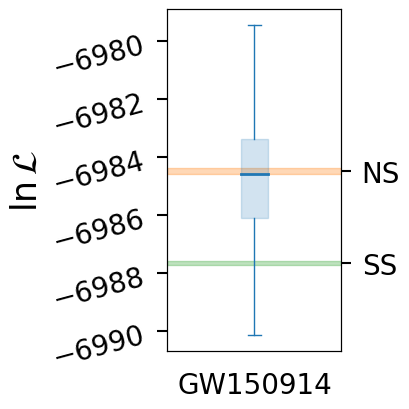

In [79]:
from matplotlib.ticker import MaxNLocator

lnzs, r_vals, samp = fi_results_10k
lnz_noise = ns_res.log_noise_evidence
fi_lnz = lnzs[0]+lnz_noise
ns_lnz = ns_res.log_bayes_factor+lnz_noise
ns_lnz_err = ns_res.log_evidence_err
ss_lnz = mcmc_res.log_bayes_factor+lnz_noise
ss_lnz_err = mcmc_res.log_evidence_err

plt.figure(figsize=(4.5,4.5))
bins = np.linspace(-6995, -6975, 50)

data = fi_lnz[r_vals > 10000]
plt.boxplot(data,showfliers=False, medianprops=dict(linewidth=2, color="C0"),patch_artist=True, boxprops=dict(alpha=0.2, edgecolor='C0'), capprops=dict(color="C0"), whiskerprops=dict(color='C0'))



# ax.hist(fi_lnz[r_vals > 10000], density=True, bins=bins, alpha=0.5)
# plt.axvline(np.median(fi_lnz[r_vals > 10000]), ls='-', color='C0', label=f'FI ({len(lnzs[0])} pts)')
# ax.axvline(ns_lnz,ls='--', color='C1', label="Nested Sampling")
plt.axhspan(ns_lnz-ns_lnz_err, ns_lnz+ns_lnz_err, color="C1", alpha=0.3)
# ax.axvline(ss_lnz, ls='--', color='C2', label="Stepping Stone")
plt.axhspan(ss_lnz-ss_lnz_err, ss_lnz+ss_lnz_err, color="C2", alpha=0.3)
# ax.legend(fontsize=10)
# ax.set_yticks([])
plt.ylabel(r"$\ln \mathcal{L}$", fontsize=25)
plt.yticks(rotation=15) 
plt.xticks([1],["GW150914"])
ax = plt.gca()
# ax.yaxis.set_major_locator(MaxNLocator(nbins=4))
ylims = plt.ylim()
ax.xaxis.set_tick_params(width=0)
ax2 = ax.twinx()
ax2.set_yticks([ns_lnz, ss_lnz])
ax2.set_yticklabels(['NS','SS'])
ax2.set_ylim(*ylims)
plt.tight_layout()
plt.show()